In [1]:
import numpy as np
import mat73
import matplotlib.pyplot as plt
import os

T33 = mat73.loadmat("D:\ct_thermometry\water_data\T33.mat")["picdata"]
print("projections, detector_height, detector_width: ", T33.shape)

def remove_dead_pixels(projection):
    mean = np.mean(projection)
    stdev = np.std(projection)  

    dead_pixels = np.abs((projection-mean)/stdev) > 3
    projection[dead_pixels] = np.NaN

    return projection

plt.subplots(2,2, figsize=(10,10))
plt.subplot(2,2,1)
projection = T33[0, :, 600:700].astype("float")
plt.imshow(projection, cmap="gray") 
plt.title("Projection with Dead Pixels")
plt.colorbar()

plt.subplot(2,2,2)
plt.hist(projection.flatten(), bins=100)
plt.ylabel("Frequency")
plt.xlabel("Pixel Value")

plt.subplot(2,2,3)
filtered_proj = remove_dead_pixels(np.copy(projection))
plt.imshow(filtered_proj, cmap="gray")
plt.title("Projection Without Dead Pixels")
plt.colorbar()

plt.subplot(2,2,4)
plt.hist(filtered_proj.flatten(), bins=100)
plt.ylabel("Frequency")
plt.xlabel("Pixel Value")
plt.show()

print("Average intensity before: %.2f" % np.mean(projection))
print("Average intensity after: %.2f" % np.nanmean(filtered_proj))
print("Total dead pixels: %.2f" % np.sum(np.isnan(filtered_proj))) 
print("")

AssertionError: D:\ct_thermometry\water_data\T33.mat does not exist

In [ ]:
def average_projections(mat_fpath, num_projs, verbose=False):
    projs = mat73.loadmat(mat_fpath)["picdata"]
    print(projs.shape)
    intensity_arr = []

    for i in range(0, 2*num_projs, 2):
        try:
            kvp8 = projs[2*num_projs+i, :, 600:700].astype("float")    
            kvp33 = projs[2*num_projs+i+1, :, 600:700].astype("float")
            kvp45 = projs[i, :, 600:700].astype("float")
            kvp60 = projs[i+1, :, 600:700].astype("float")    
        except:
            print("Projection " + str(i//2) + " is incomplete")
        else:
            for proj in [kvp8, kvp33, kvp45, kvp60]:
                intensity_arr.append(np.nanmean(remove_dead_pixels(proj)))

    intensity_arr = np.mean(np.reshape(np.array(intensity_arr), (num_projs-1,4)), axis=0)
    energies = ["8kvp", "33kvp", "45kvp", "60kvp"]

    if verbose:
        print(mat_fpath.split("\\")[3])

        for i in range(4):
            print("Average intensity in " + energies[i] + " bin: " + str(intensity_arr[i]))
        print("")

    return intensity_arr

intensity_vs_temp = []
mat_fnames = ['T33.mat', 'T35.mat', 'T40.mat', 'T45.mat', 'T50.mat', 'T55.mat', 'T60.mat', 'T65.mat']
num_projs = [100, 100, 100, 100, 80, 50, 20, 8]

for i in range(len(num_projs)): 
    intensity_arr = average_projections("D:\ct_thermometry\water_data\\" + mat_fnames[i], num_projs[i], True)
    intensity_vs_temp.append(intensity_arr)

(398, 256, 1280)
Projection 99 is incomplete
T33.mat
Average intensity in 8kvp bin: 1167.222544361583
Average intensity in 33kvp bin: 542.4749675010737
Average intensity in 45kvp bin: 319.63529981626255
Average intensity in 60kvp bin: 180.70753526442763

(398, 256, 1280)
Projection 99 is incomplete
T35.mat
Average intensity in 8kvp bin: 1167.6460513860984
Average intensity in 33kvp bin: 543.1026993574809
Average intensity in 45kvp bin: 320.0788321691667
Average intensity in 60kvp bin: 180.93901979184585

(398, 256, 1280)
Projection 99 is incomplete
T40.mat
Average intensity in 8kvp bin: 1169.6544030172797
Average intensity in 33kvp bin: 543.8839164728258
Average intensity in 45kvp bin: 320.5500254991405
Average intensity in 60kvp bin: 181.16313820453408

(398, 256, 1280)
Projection 99 is incomplete
T45.mat
Average intensity in 8kvp bin: 1171.1832717832308
Average intensity in 33kvp bin: 544.4391651791123
Average intensity in 45kvp bin: 320.9314322771009
Average intensity in 60kvp bin: 

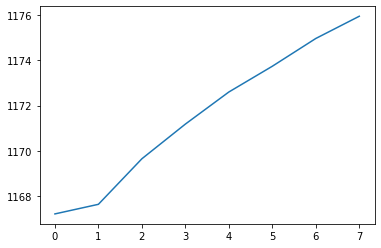

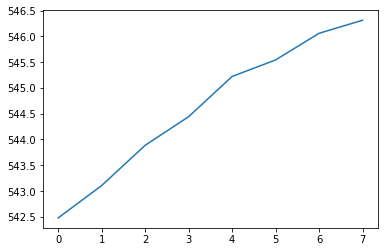

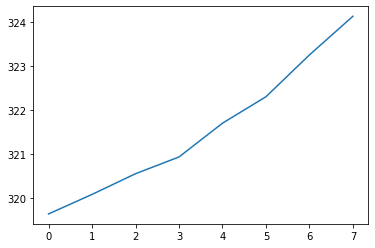

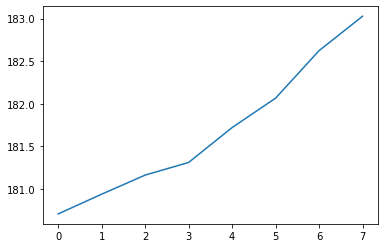

In [52]:
intensity_vs_temp = np.asarray(intensity_vs_temp)
plt.plot(intensity_vs_temp[:,0])
plt.show()
plt.plot(intensity_vs_temp[:,1])
plt.show()
plt.plot(intensity_vs_temp[:,2])
plt.show()
plt.plot(intensity_vs_temp[:,3])
plt.show()


# bin1 = []
# bin2 = []
# bin3 = []
# bin4=[]
# data = [arr1, arr2, arr3, arr4]

# for i in range(4):
#     arr = data[i]
#     bin1.append(arr[0] - arr[1])
#     bin2.append(arr[1] - arr[2])
#     bin3.append(arr[2] - arr[3])
#     bin4.append(arr[3])

# plt.plot(bin1)
# plt.show() 
# plt.plot(bin2)
# plt.show() 
# plt.plot(bin3)
# plt.show() 
# plt.plot(bin4)
# plt.show() 